In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

red_wine['quality_label'] = red_wine['quality'].apply(lambda value:'low' if value  <=6 else 'medium' if value <= 8 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low','medium','high'])


white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 6 else 'medium' if value <= 8 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories= ['low', 'medium' , 'high'])

wines = pd.concat([red_wine,white_wine])

In [3]:
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


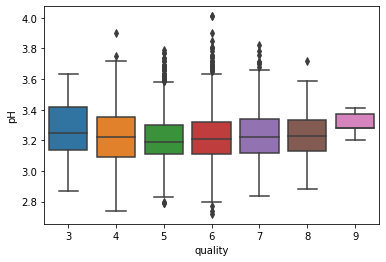

In [4]:
sns.boxplot(x='quality', y = 'pH', data=wines);

In [5]:
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [6]:
wines.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
quality_label           category
dtype: object

In [7]:
X = wines.drop (['quality_label', 'wine_type'], axis=1)

y = wines['quality_label']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [9]:
X.shape

(6497, 12)

In [10]:
y.shape

(6497,)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
y_predict = knn.predict(X_test)

In [13]:
metrics.accuracy_score(y_test,y_predict)

0.8630769230769231

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
scores = cross_val_score(knn,X,y,cv = 10, scoring='accuracy')

C:\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [16]:
print(scores.mean())

0.8155934573900676


In [17]:
k_range = range(1,20)
k_scores = []

for k in k_range:
    knn =KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())

In [18]:
k_scores

[0.8040580328063008,
 0.8128356724107302,
 0.801904068218156,
 0.8129897554331734,
 0.8088318825131757,
 0.8153002901640315,
 0.8077557884763428,
 0.813605732220051,
 0.8114496358145319,
 0.8108347249363416,
 0.8099108189731746,
 0.8099109374074732,
 0.8068320009474744,
 0.8109902291703677,
 0.8097582755966128,
 0.8120671522472909,
 0.8105276248001422,
 0.8125288091431278,
 0.813144549061408]

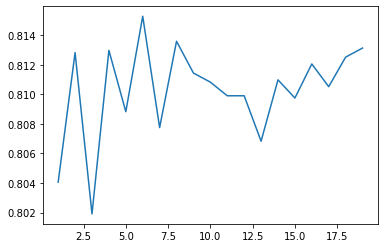

In [19]:
sns.lineplot(x=k_range,y=k_scores);